# E-Commerce Customer Behavior & Sales Analysis

This notebook explores sales performance and customer behavior
using transactional e-commerce data. The goal is to identify
revenue drivers and actionable business insights.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/ecommerce_eda.csv")
df.head()

,order_id,customer_id,date,age,gender,city,product_category,unit_price,quantity,discount_amount,total_amount,payment_method,device_type,session_duration_minutes,pages_viewed,is_returning_customer,delivery_time_days,customer_rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.isnull().sum()

,0
order_id,0
customer_id,0
date,0
age,0
gender,0
city,0
product_category,0
unit_price,0
quantity,0
discount_amount,0


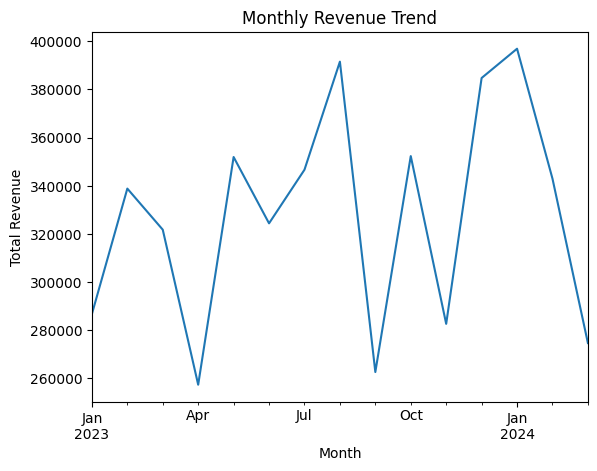

In [6]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create month column
df['month'] = df['date'].dt.to_period('M')

# Monthly revenue
monthly_revenue = df.groupby('month')['total_amount'].sum()

# Plot
plt.figure()
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

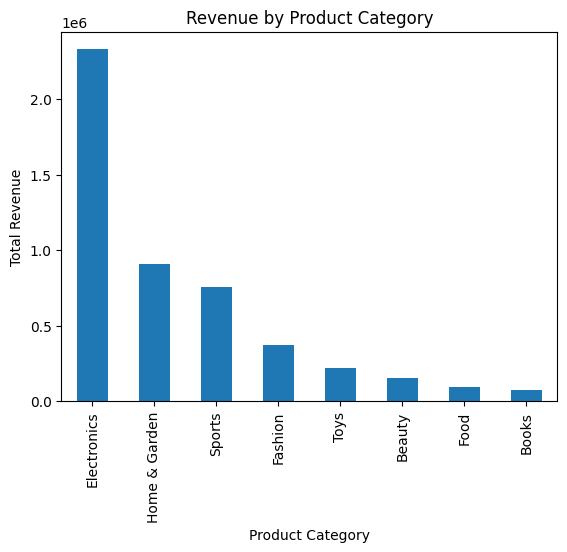

In [7]:
category_revenue = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

plt.figure()
category_revenue.plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

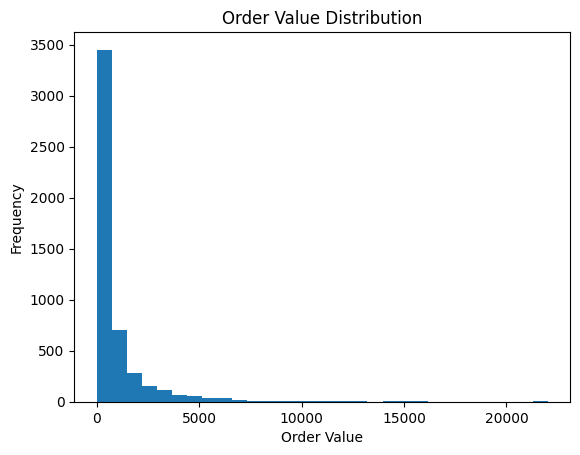

In [8]:
plt.figure()
plt.hist(df['total_amount'], bins=30)
plt.title('Order Value Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()

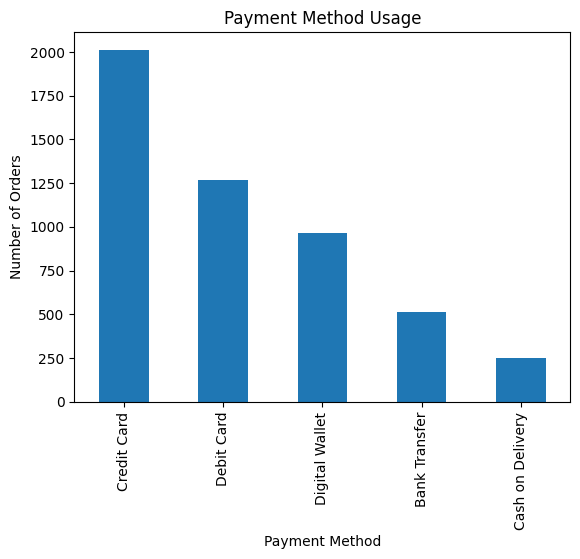

In [9]:
payment_counts = df['payment_method'].value_counts()

plt.figure()
payment_counts.plot(kind='bar')
plt.title('Payment Method Usage')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.show()

## Key Insights
- A few categories contribute most of the revenue.
- Revenue shows clear variation over time.
- Order values are right-skewed, with some high-value purchases.

## Business Takeaways
- Focus inventory and marketing on top categories.
- Plan promotions around peak periods.
- Target high-value customers with retention offers.